-MAGIC takes a Google Play Store app as an input and outputs a 4 dimensional numerical signature

- There 4 dimensional (4 feature) numerical inputs (signatures) with labels!
- We need a simple model that takes these inputs and labels them (Virus, Not a Virus)
- We also need you to evaluate your model. Choose any metric you want, but don't forget to explain why, since I don't know much about this field (that is why we need your help!)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')

## TAKE A LOOK THE DATA

In [3]:
df.head()

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1897 non-null   float64
 1   feature_2  1899 non-null   float64
 2   feature_3  1893 non-null   float64
 3   feature_4  1897 non-null   float64
 4   isVirus    1999 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.5 KB


In [5]:
df.shape

(1999, 5)

- Visualize the data (so that people like me can understand!)
- Clean up the data (balance it out, impute missing values and so on... depending on the method you are going to use!)
- Visualize the cleaned data (so that people like me can understand the effect of cleaning process!)
- Create a simple model that performs reasonably well. (If it doesn't perform well, comment on why and how to improve it!)
- Evaluate the model with a testset you will create from the dataset. (Pretty plots make things easier to understand)

## VISUALIZING THE DATA (Before Cleaning Process)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

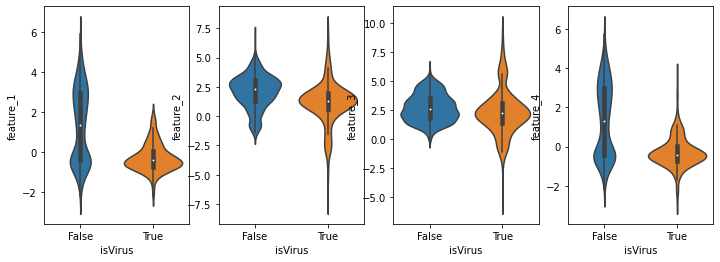

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

sns.violinplot(x="isVirus", y="feature_1", data=df, ax=axs[0])
sns.violinplot(x="isVirus", y="feature_2", data=df, ax=axs[1])
sns.violinplot(x="isVirus", y="feature_3", data=df, ax=axs[2])
sns.violinplot(x="isVirus", y="feature_4", data=df, ax=axs[3])

plt.show()
# it's hard for me to comment this output. so i'm gonna use sns.pairplot for visualization

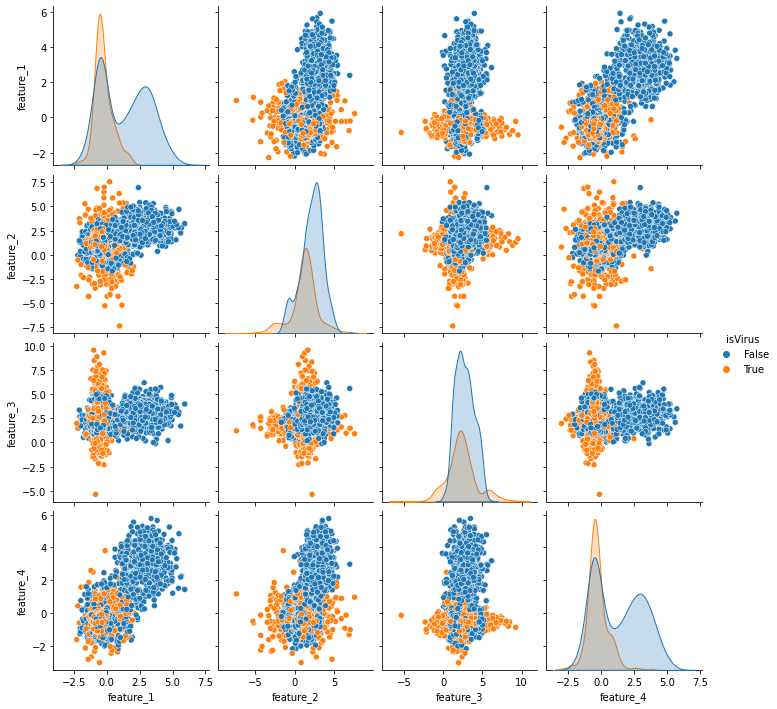

In [9]:
sns.pairplot(df, hue='isVirus')

### It's so clear that "feature_1-isVirus" and "feature_4-isVirus" distributions are so similar. It means that if we calculate df.corr(), we gonna find a strong correlation coefficient. Let's try!

<AxesSubplot:>

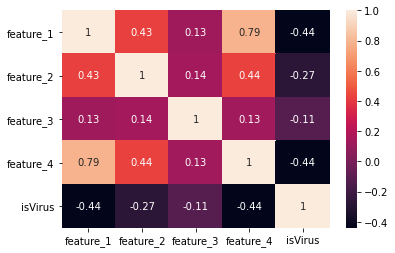

In [10]:
# correlation analysis
# Values above -0.7 and +0.7 are where the negative and positive correlation is strong for us
sns.heatmap(df.corr(), annot=True)
# as we see in the output, there is a strong positive correlation between feature_1 and feature_4

## DATA PREPROCESSING BEFORE CREATING MODEL

In [45]:
# it seems like the data is not normally distrubeted. But let's see p value to be sure about it
from scipy.stats import kstest

In [ ]:
# Örnek veri seti
data = np.random.normal(0, 1, 100)

# Shapiro-Wilk Testi
stat, p = stats.shapiro(df)
print("Shapiro-Wilk Testi İstatistiği: {}, p-değeri: {}".format(stat, p))

- Shapiro-Wilk Test: The Shapiro-Wilk test is sensitive to the assumption of small sample sizes and normal distribution. 
- This test is used to test the fit of the data set to the normal distribution.

In [53]:
test_stat = kstest(df.iloc[:,1], 'norm')
test_stat

KstestResult(statistic=nan, pvalue=nan)

In [11]:
df.isna().sum() 

feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64

In [13]:
#nan-percentage 
df.isna().sum() /1999*100
#we can see the percentage of null values per column

feature_1    5.102551
feature_2    5.002501
feature_3    5.302651
feature_4    5.102551
isVirus      0.000000
dtype: float64

In [14]:
df.describe()

,feature_1,feature_2,feature_3,feature_4
count,1897.000000,1899.000000,1893.000000,1897.000000
mean,0.814404,1.795843,2.621096,0.807499
std,1.729538,1.605611,1.474973,1.768597
min,-2.285499,-7.363119,-5.363119,-3.006499
25%,-0.556433,0.975148,1.671905,-0.563357
50%,0.084789,1.881904,2.499623,0.021857
75%,2.270955,2.840511,3.470200,2.319822
max,5.929096,7.549658,9.549658,5.759355


- take a look the mean-std-%50(median) values. If their values are closer , then the feature has normal dist.
- feature 2<<< normal dist.
- so i'm gonna use different methods for filling nan values
- feature1-3-4 >>>> filling with median value (bcz they are not normal dist)
- feature2 >>> filling with mean value (bcz it is normal dist)

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
feature2 = df.iloc[:, 1]

In [17]:
imputer = SimpleImputer(strategy= 'mean')

In [18]:
feature2_imputed = imputer.fit_transform(feature2.to_numpy().reshape(-1,1))

In [19]:
df.iloc[:,1] = feature2_imputed

In [21]:
df.iloc[:,1].isna().sum()

0

In [22]:
imputer2 = SimpleImputer(strategy= 'median')

In [23]:
other_features = df.drop(['feature_2', 'isVirus'], axis=1)

In [24]:
other_feature_imputed = imputer2.fit_transform(other_features)

In [25]:
df2 = pd.concat([df, pd.DataFrame(other_feature_imputed)], axis=1)

In [26]:
df2.drop(labels=['feature_1', 'feature_3', 'feature_4'], axis=1, inplace = True)

In [27]:
df2

,feature_2,isVirus,0,1,2
0,0.308799,False,-0.233467,2.484015,1.732721
1,1.238482,False,1.519003,3.344450,0.783744
2,1.916748,False,0.400640,3.291096,-0.918519
3,0.209703,False,-1.616474,1.461544,-0.291837
4,5.299829,True,1.480515,2.640670,1.867559
...,...,...,...,...,...
1994,2.139847,False,2.532559,3.859104,2.190373
1995,3.562990,False,0.084789,2.499623,2.499590
1996,1.977436,False,4.059027,2.144760,4.257220
1997,3.962342,False,3.457310,3.770837,3.243168


In [28]:
#df = df.rename(columns={'A': 'X'})
df2 = df2.rename(columns = {0: 'feature_1', 1: 'feature_3', 2: 'feature_4'} )

In [29]:
df2

,feature_2,isVirus,feature_1,feature_3,feature_4
0,0.308799,False,-0.233467,2.484015,1.732721
1,1.238482,False,1.519003,3.344450,0.783744
2,1.916748,False,0.400640,3.291096,-0.918519
3,0.209703,False,-1.616474,1.461544,-0.291837
4,5.299829,True,1.480515,2.640670,1.867559
...,...,...,...,...,...
1994,2.139847,False,2.532559,3.859104,2.190373
1995,3.562990,False,0.084789,2.499623,2.499590
1996,1.977436,False,4.059027,2.144760,4.257220
1997,3.962342,False,3.457310,3.770837,3.243168


In [30]:
df2 = df2.reindex(columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'isVirus'])

In [31]:
df2

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,False
1995,0.084789,3.562990,2.499623,2.499590,False
1996,4.059027,1.977436,2.144760,4.257220,False
1997,3.457310,3.962342,3.770837,3.243168,False


## standard scaling for features

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
df2.iloc[:, :4] = scaler.fit_transform(df2.iloc[:,:4])

In [35]:
df2

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.597297,-0.950477,-0.091024,0.557633,False
1,0.438427,-0.356250,0.508493,0.009435,False
2,-0.222535,0.077280,0.471318,-0.973915,False
3,-1.414665,-1.013817,-0.803443,-0.611899,False
4,0.415680,2.239651,0.018127,0.635525,True
...,...,...,...,...,...
1994,1.037446,0.219878,0.867084,0.822006,False
1995,-0.409206,1.129511,-0.080150,1.000632,False
1996,1.939601,0.116069,-0.327405,2.015966,False
1997,1.583981,1.384766,0.805583,1.430177,False


## label encoder for target value

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
df2['isVirus'].value_counts()
# checking whether there are just true and false values or not

False    1332
True      667
Name: isVirus, dtype: int64

In [38]:
le = LabelEncoder()

In [39]:
df2['isVirus'] = le.fit_transform(df2['isVirus'])

In [40]:
df2

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.597297,-0.950477,-0.091024,0.557633,0
1,0.438427,-0.356250,0.508493,0.009435,0
2,-0.222535,0.077280,0.471318,-0.973915,0
3,-1.414665,-1.013817,-0.803443,-0.611899,0
4,0.415680,2.239651,0.018127,0.635525,1
...,...,...,...,...,...
1994,1.037446,0.219878,0.867084,0.822006,0
1995,-0.409206,1.129511,-0.080150,1.000632,0
1996,1.939601,0.116069,-0.327405,2.015966,0
1997,1.583981,1.384766,0.805583,1.430177,0


In [41]:
df2['isVirus'].value_counts()

0    1332
1     667
Name: isVirus, dtype: int64

In [66]:
# so, it says that data is not balanced.
# 1332 of the values >> False
# 667 of the values >> True

## Vısualizing the data after imputing, scaling, label encoding steps

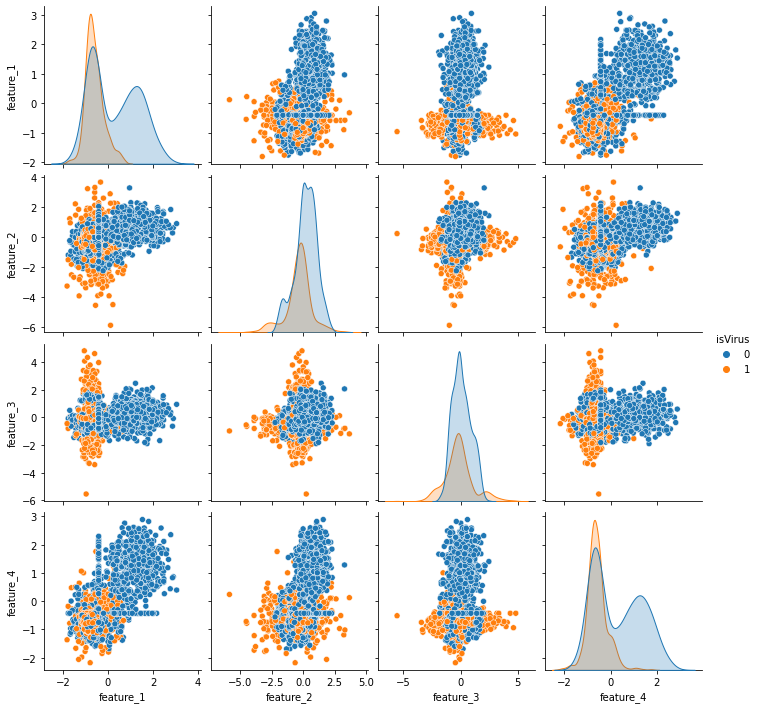

In [78]:
sns.pairplot(df2, hue='isVirus')

## train-test split and modeling


## first way--gradient boosting classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [49]:
# defining features and target value
X = df2.iloc[:, 0:4]
y = df2.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [50]:
# defining gradient boosting classification
clf = GradientBoostingClassifier()

In [51]:
# training
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [52]:
#testing the X_test data
y_pred = clf.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)

In [54]:
print("Accuracy Rate: {:.2f}%".format(accuracy*100))


Accuracy Rate: 87.00%


In [61]:
confusion_matrix(y_test, y_pred)

array([[240,  23],
       [ 29, 108]], dtype=int64)

<AxesSubplot:>

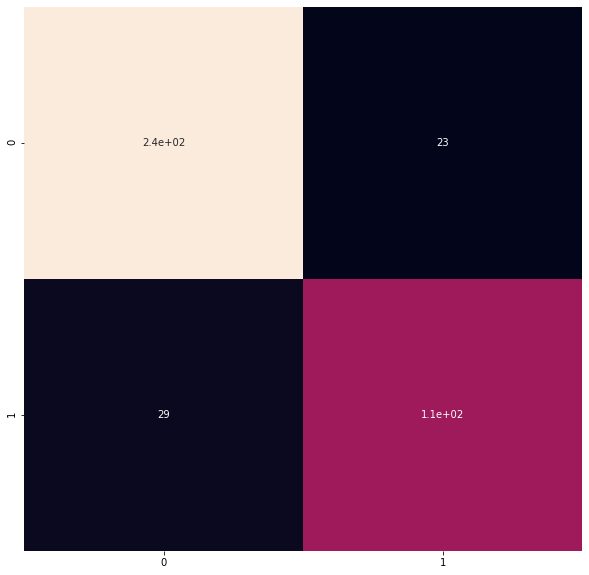

In [63]:
plt.figure(figsize= (10,10)) 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)

In [76]:
# results for gradient boosting classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       263
           1       0.82      0.79      0.81       137

    accuracy                           0.87       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.87      0.87      0.87       400



## second way--decision tree classifier

In [70]:
# tree instantiate 
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
# X_test verileri ile modelimden tahmin alıyorum
y_pred2 = tree.predict(X_test)

In [72]:
confusion_matrix(y_test, y_pred2)

array([[235,  28],
       [ 28, 109]], dtype=int64)

<AxesSubplot:>

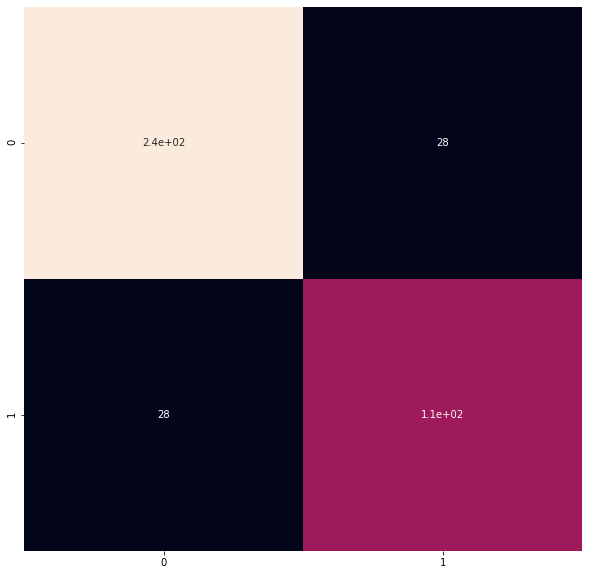

In [73]:
plt.figure(figsize= (10,10)) 
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cbar=False)

In [77]:
# using decision tree classifier
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       263
           1       0.80      0.80      0.80       137

    accuracy                           0.86       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.86      0.86      0.86       400



## Commenting The Results

The accuracy metric may be insufficient to measure the performance of a model trained on a dataset with class imbalance. This is because the model can have a high accuracy rate by predicting only the majority class.
Therefore, we can focus on f1-score. The f1-score is a metric that measures classification performance such as accuracy, precision, and recall. The F1 score is calculated by taking the harmonic average of the precision and recall metrics.

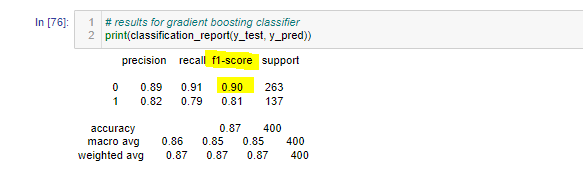


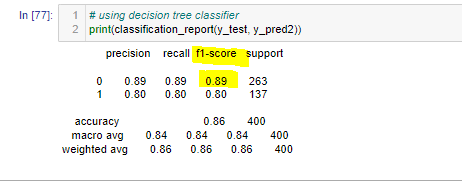

### i searched little bit. bcz i don't exactly know the reasons why Gradient Boosting Classifier might  work better than Decision Tree Classifier:
- When dataset is very large: Gradient Boosting Classifier performs better on large datasets because it consists of multiple Decision Trees that can be run in parallel.

- High-dimensional datasets: Gradient Boosting Classifier performs better on high-dimensional datasets because it is designed to work on high-dimensional datasets.

- Situations requiring higher accuracy: Gradient Boosting Classifier provides higher accuracy because it combines many weak classifiers to form a strong classifier.

- More resilient to noise in the dataset: The Gradient Boosting Classifier is less sensitive to noise in the dataset because each Decision Tree is created only at a certain depth to reduce the risk of overfitting.